# Feature Space Mappings


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import HelpfulFunctions as hp
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

%matplotlib inline
plt.style.use('seaborn')

In [2]:
np.random.seed(56)

In [3]:
# Function to map the colors as a list from the input list of x variables
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==0:
            cols.append('blue')
        elif l==1:
            cols.append('red')
        else:
            cols.append('green')
    return cols

## Creating a Non-Linear Two Class Problem

In [7]:
x = np.random.rand(1000,2)

In [8]:
r = 0.4; c1 = 0.5; c2 = 0.5

In [9]:
y = []
for row in x:
    if (row[0]-c1)**2 + (row[1]-c2)**2 >= r*r:
        y.append(1)
    else:
        y.append(0)

Text(0, 0.5, '$x_2$')

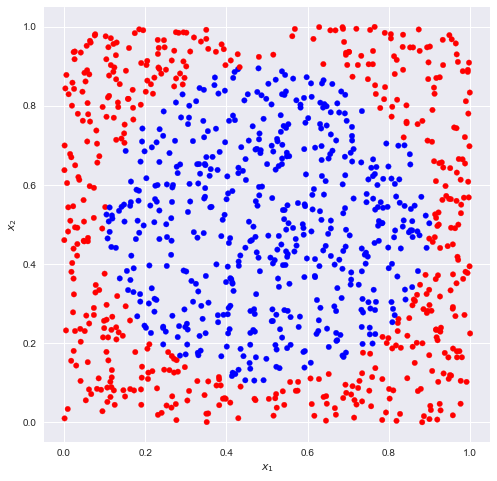

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(x[:, 0], x[:, 1], c=pltcolor(y), s=30, cmap = "plasma")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

## Using Linear Features

In [11]:
X_2 = pd.DataFrame()

In [12]:
X_2['x1'] = x[:,0]

In [13]:
X_2['x2'] = x[:,1]

In [14]:
clf = SVC(kernel = 'linear', C=1)

In [15]:
clf.fit(X_2, y)

SVC(C=1, kernel='linear')

In [16]:
y_pred = clf.predict(X_2)

In [17]:
cm = confusion_matrix(y, y_pred)

In [18]:
print(cm)

[[353 151]
 [289 207]]


Text(0, 0.5, '$x_2$')

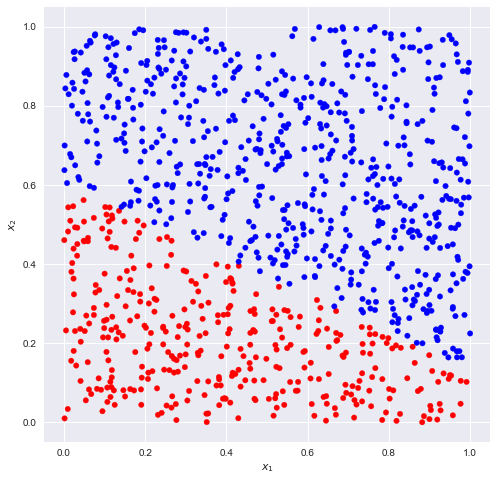

In [19]:
plt.figure(figsize=(8,8))
plt.scatter(x[:, 0], x[:, 1], c=pltcolor(y_pred), s=30,  cmap = "plasma")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

## Classifying Using Additional Non-Linear Features

In [20]:
X_5 = X_2.copy()

In [21]:
X_5['x1_x1'] = x[:,0] * x[:,0]

In [22]:
X_5['x2_x2'] = x[:,1] * x[:,1]

In [23]:
X_5['x1_x2'] = x[:,0] * x[:,1]

In [24]:
clf = SVC(kernel = 'linear', C=1)

In [25]:
clf.fit(X_5,y)

SVC(C=1, kernel='linear')

In [26]:
y_pred = clf.predict(X_5)

In [27]:
cm = confusion_matrix(y, y_pred)

In [28]:
print(cm)

[[485  19]
 [ 27 469]]


In [29]:
y_col = y_pred.copy()

for i in range(0,len(y)):
    if y_pred[i] != y[i]:
        y_col[i] = 2        

Text(0, 0.5, '$x_2$')

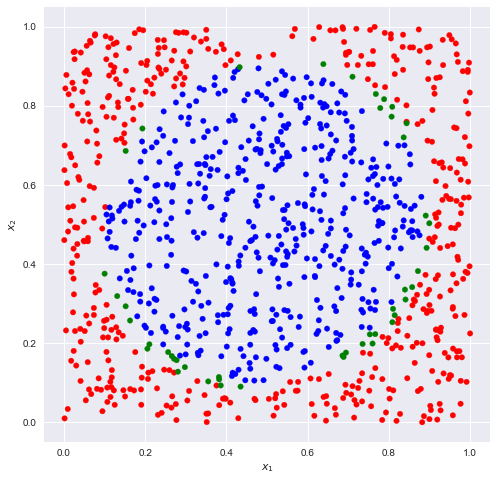

In [30]:
plt.figure(figsize=(8,8))
plt.scatter(x[:, 0], x[:, 1], c=pltcolor(y_col), s=30, cmap = "plasma")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

## SVM with Original Features and a Different Kernel

In [31]:
clf = SVC(kernel = 'poly', C=1, gamma='auto', coef0=1.0)

In [32]:
clf.fit(X_2,y)

SVC(C=1, coef0=1.0, gamma='auto', kernel='poly')

In [33]:
y_pred = clf.predict(X_2)

In [34]:
cm = confusion_matrix(y, y_pred)

In [35]:
print(cm)

[[495   9]
 [ 15 481]]


In [36]:
y_col = y_pred.copy()

for i in range(0,len(y)):
    if y_pred[i] != y[i]:
        y_col[i] = 2    

Text(0, 0.5, '$x_2$')

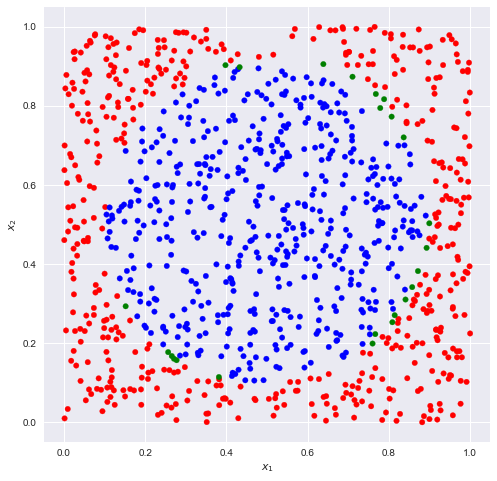

In [37]:
plt.figure(figsize=(8,8))
plt.scatter(x[:, 0], x[:, 1], c=pltcolor(y_col), s=30, cmap = "plasma")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')